In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ******************************************** HAPI-1 ************************************************************
# ////////////////////////////////////////////////////////
# Do te krijoj nje databaze te re me te dhenat e filet qe kam ne csv

In [ ]:
# patient_data = pd.read_csv('Disease_symptom.csv')
# print(patient_data.head())

# bej lidhjen me db dhe krijoj mydb
# from mysql.connector import Error
# try:
#     conn = mysql.connector.connect(host = 'localhost', user = 'root', password = 'root') # dueht te vendosni username dhe passw te db tuaj
#     if conn.is_connected():
#         cursor = conn.cursor()
#         cursor.execute("CREATE DATABASE PATIENT")
#         print("Databaza u krijua")
#         conn.commit()
# except Error as e:
#     print("Kemi gabim ne lidhjen me databazen",e)

# conn.close()

# ******************************************** HAPI-2 ************************************************************
# Pasi krijova databazen e mbylla dhe rikthehem serish ne te per te krijuar tabelat sipas file=it te te dhenave


In [ ]:
# mydb = mysql.connector.connect(host = 'localhost', user = 'root', password = 'root', database = 'PATIENT')

# table = mydb.cursor()
# krijojme dy tabela te cilat do te organizoj te dhenat e mia
# patientinfo = table.execute("create table patientinfo (Id int primary key, Age int, Gender Varchar(30), Outcome_Variable varchar(50))")
# patientsymp = table.execute("create table patientsymp (Id int primary key auto_increment, PatientId int, Fever varchar(50), Cough varchar(50), Fatigue varchar(50), Difficulty varchar(50), Blood_Pressure varchar(50), Cholesterol_Level varchar(50))")

# Do te mbushim tabelat e db tone me te dhenat e filet csv qe kemi
# for index, row in patient_data.iterrows():
#     sql = 'insert into patientinfo(Id,Age,Gender,Outcome_Variable) values (%s,%s,%s,%s)'
#     val = (row['PatientID'], row['Age'], row['Gender'], row['Outcome_Variable'])
#     table.execute(sql, val)

# for index, row in patient_data.iterrows():
#     sql = 'insert into patientsymp(PatientId, Fever, Cough, Fatigue, Difficulty, Blood_Pressure, Cholesterol_Level) values (%s,%s,%s,%s,%s,%s,%s)'
#     val = (row['PatientID'], row['Fever'], row['Cough'], row['Fatigue'],row['Difficulty Breathing'], row['Blood_Pressure'], row['Cholesterol_Level'])
#     table.execute(sql, val)  

# si te bejme nje alter table nga python
# table.execute("alter table patientsymp add foreign key (PatientID) references patientinfo(Id)")
# mydb.commit()

# tashme databaza eshte krijuar dhe jemi gati ta studiojme ate

In [12]:
# ndertojme variablin mycursor i cili gjenerohet nga ekzekutimi i metodes cursor() e cila na lejon te ekezkutojme nga python ne mysql
mydb = mysql.connector.connect(host = 'localhost', user = 'admin', password = 'root', database = 'PATIENT')
mycursor = mydb.cursor()

In [ ]:
# # ******************************************** HAPI-3 ************************************************************
# # bejme nje grafik te te dhenave
# mund te beni dhe descriptive analyse
# me jep shperndarjen e moshave sipas gjinise

In [6]:
sql_plot_query = """ select count(gender) as NrGender, age
                    from patientinfo
                    where gender = %s
                    group by age;"""
mycursor.execute(sql_plot_query, ('Female',))

In [4]:
# nqs une marr fetchall ben marrjen e vlerave te executit te fundit
result_query = mycursor.fetchall()
result_query

[(1, 19),
 (5, 25),
 (2, 28),
 (8, 29),
 (18, 30),
 (1, 31),
 (1, 32),
 (20, 35),
 (6, 38),
 (1, 39),
 (14, 40),
 (8, 42),
 (1, 43),
 (19, 45),
 (1, 48),
 (13, 50),
 (18, 55),
 (15, 60),
 (13, 65),
 (7, 70),
 (2, 80),
 (2, 90)]

In [7]:
# nqs une marr fetchall ben marrjen e vlerave te executit te fundit
result_query1 = mycursor.fetchone()
result_query1

(1, 19)

In [8]:
mydata = pd.DataFrame(result_query, columns=['NrGender', 'Age'])
mydata.head()

,NrGender,Age
0,1,19
1,5,25
2,2,28
3,8,29
4,18,30


Text(0.5, 1.0, 'Frekuenca e moshave per gjinine femer')

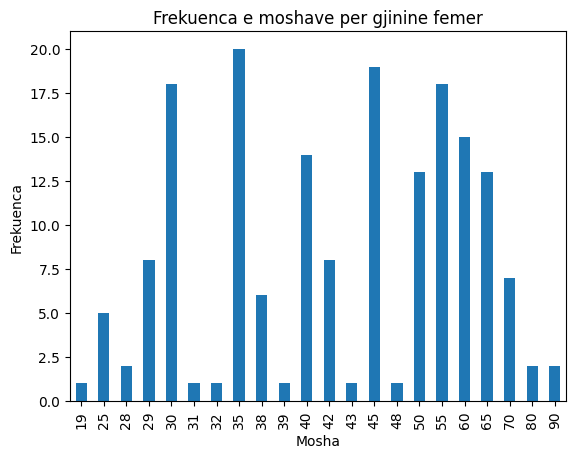

In [10]:
mydata.plot(x='Age', y='NrGender', kind='bar', xlabel='Mosha', ylabel='Frekuenca', legend = None)
plt.title('Frekuenca e moshave per gjinine femer')

# # ******************************************** HAPI-4 ************************************************************
# ndertojme te dhenat per modelin e regresit
# do te mendojme si variable te varur Outcome_Variable
# dhe do te marrim Age,
#  Cough dhe Fever, Difficulty si variabla te pavarura
# ndertojme dataframin sipas te dhenave tona me query

In [32]:
sql_data_select = """ select ps.Cough, ps.Difficulty,ps.Fever, pi.Age, pi.Outcome_Variable
                        from patientsymp as ps
                        inner join patientinfo as pi on pi.PatientId =  ps.PatientId"""
mycursor.execute(sql_data_select)
mydata2 = mycursor.fetchall()
mydata2

[('No', 'Yes', 'Yes', 19, 'Positive'),
 ('Yes', 'No', 'No', 25, 'Negative'),
 ('Yes', 'No', 'No', 25, 'Negative'),
 ('Yes', 'Yes', 'Yes', 25, 'Positive'),
 ('Yes', 'Yes', 'Yes', 25, 'Positive'),
 ('No', 'No', 'Yes', 25, 'Positive'),
 ('Yes', 'Yes', 'Yes', 25, 'Positive'),
 ('Yes', 'Yes', 'Yes', 25, 'Positive'),
 ('Yes', 'No', 'No', 28, 'Negative'),
 ('Yes', 'No', 'No', 28, 'Negative'),
 ('No', 'Yes', 'Yes', 28, 'Positive'),
 ('Yes', 'No', 'No', 29, 'Negative'),
 ('Yes', 'No', 'No', 29, 'Negative'),
 ('No', 'No', 'No', 29, 'Negative'),
 ('No', 'No', 'No', 29, 'Negative'),
 ('Yes', 'No', 'No', 29, 'Negative'),
 ('No', 'No', 'Yes', 29, 'Negative'),
 ('Yes', 'Yes', 'No', 29, 'Negative'),
 ('Yes', 'Yes', 'Yes', 29, 'Positive'),
 ('Yes', 'Yes', 'Yes', 29, 'Positive'),
 ('Yes', 'Yes', 'Yes', 29, 'Positive'),
 ('Yes', 'No', 'Yes', 29, 'Positive'),
 ('No', 'No', 'Yes', 30, 'Negative'),
 ('No', 'No', 'Yes', 30, 'Negative'),
 ('Yes', 'No', 'No', 30, 'Negative'),
 ('Yes', 'No', 'Yes', 30, 'Negativ

In [33]:
df = pd.DataFrame(mydata2, columns=['Cough', 'Difficulty','Fever', 'Age', 'Outcome_Variable'])
df.head()

,Cough,Difficulty,Fever,Age,Outcome_Variable
0,No,Yes,Yes,19,Positive
1,Yes,No,No,25,Negative
2,Yes,No,No,25,Negative
3,Yes,Yes,Yes,25,Positive
4,Yes,Yes,Yes,25,Positive


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cough             349 non-null    object
 1   Difficulty        349 non-null    object
 2   Fever             349 non-null    object
 3   Age               349 non-null    int64 
 4   Outcome_Variable  349 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [35]:
df['Outcome_Variable']=df['Outcome_Variable'].astype('category')
df['Outcome_Variable']=df['Outcome_Variable'].cat.codes

In [36]:
df['Cough']=df['Cough'].astype('category')
df['Cough']=df['Cough'].cat.codes

df['Fever']=df['Fever'].astype('category')
df['Fever']=df['Fever'].cat.codes

df['Difficulty']=df['Difficulty'].astype('category')
df['Difficulty']=df['Difficulty'].cat.codes

In [37]:
df.head()

,Cough,Difficulty,Fever,Age,Outcome_Variable
0,0,1,1,19,1
1,1,0,0,25,0
2,1,0,0,25,0
3,1,1,1,25,1
4,1,1,1,25,1


In [38]:
df.corr()

,Cough,Difficulty,Fever,Age,Outcome_Variable
Cough,1.000000,0.223115,0.129183,-0.104511,-0.011530
Difficulty,0.223115,1.000000,0.262273,-0.207296,0.093905
Fever,0.129183,0.262273,1.000000,-0.011255,0.180721
Age,-0.104511,-0.207296,-0.011255,1.000000,0.053525
Outcome_Variable,-0.011530,0.093905,0.180721,0.053525,1.000000


<Axes: >

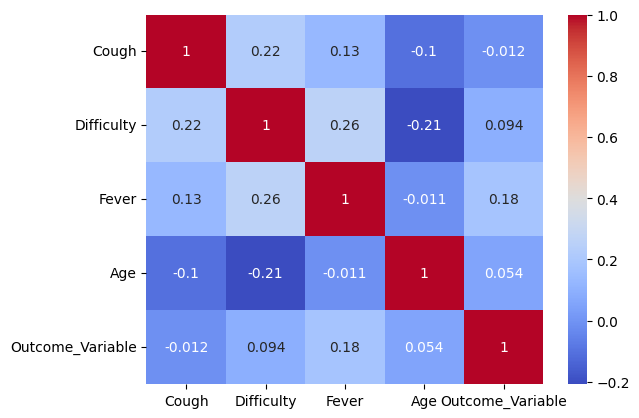

In [39]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

# # ******************************************** HAPI-5 ************************************************************
# fillojme me ndertimin e modelit te regresit te shumfishte llogjik

In [40]:
# ndajme variablat
X = df.drop(['Outcome_Variable'], axis=1)
y=df['Outcome_Variable']

In [41]:
X.head()

,Cough,Difficulty,Fever,Age
0,0,1,1,19
1,1,0,0,25
2,1,0,0,25
3,1,1,1,25
4,1,1,1,25


In [42]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_features

array([[0.        , 1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.08450704],
       [1.        , 0.        , 0.        , 0.08450704],
       ...,
       [0.        , 0.        , 1.        , 0.92957746],
       [0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        , 1.        ]])

In [43]:
from sklearn.model_selection import train_test_split
scaled_features_train, scaled_features_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=39)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
log_regr = LogisticRegression()
log_regr.fit(scaled_features_train, y_train)

LogisticRegression()

In [46]:
ypred = log_regr.predict(scaled_features_train)

In [47]:
ypred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int8)

In [48]:
accsc=accuracy_score(y_train, ypred)
accsc

0.5842293906810035

In [49]:
ypred_test = log_regr.predict(scaled_features_test)

In [50]:
accsc_test=accuracy_score(y_test, ypred_test)
accsc_test

0.44285714285714284